In [1]:
# https://www.kaggle.com/affanamin/handling-imbalanced-data-in-deeplearning

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [4]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 100)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")

In [6]:
df = pd.read_csv("datasets/Churn_Modelling.csv",encoding="utf-8", delimiter=',')
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [7]:
df2 = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [8]:
df2.shape

(10000, 11)

In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [11]:
df2['Gender'].replace({'Male':1, 'Female':2}, inplace=True)

In [12]:
df2.head()

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France       2   42       2       0.00              1   
1          608     Spain       2   41       1   83807.86              1   
2          502    France       2   42       8  159660.80              3   
3          699    France       2   39       1       0.00              2   
4          850     Spain       2   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0

In [13]:
df2['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [16]:
df3 = pd.get_dummies(data=df2, columns=['Geography'])

In [17]:
df3.head()

CreditScore  Gender  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619       2   42       2       0.00              1          1   
1          608       2   41       1   83807.86              1          0   
2          502       2   42       8  159660.80              3          1   
3          699       2   39       1       0.00              2          0   
4          850       2   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  Exited  Geography_France  \
0               1        101348.88       1                 1   
1               1        112542.58       0                 0   
2               0        113931.57       1                 1   
3               0         93826.63       0                 1   
4               1         79084.10       0                 0   

   Geography_Germany  Geography_Spain  
0                  0                0  
1                  0                1  
2                  0                0  
3                  0                0  
4                  0                1

In [18]:
df3.shape

(10000, 13)

<AxesSubplot:xlabel='Exited', ylabel='count'>

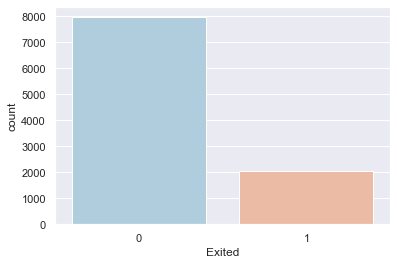

In [19]:
sns.countplot(x='Exited', data=df3, palette='RdBu_r')

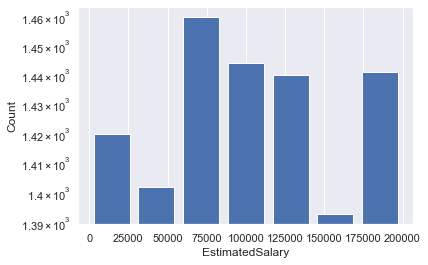

In [22]:
plt.hist(df3.EstimatedSalary, bins=7, rwidth=0.8)
plt.xlabel('EstimatedSalary')
plt.ylabel('Count')
plt.yscale('log')
plt.show()

In [23]:
MaxThershold = df3['EstimatedSalary'].quantile(0.999)
MaxThershold

199775.69996000003

In [24]:
MinThershold = df3['EstimatedSalary'].quantile(0.015)
MinThershold

2920.6087

In [25]:
df4 = df3[(df3['EstimatedSalary'] < MaxThershold) & (df3['EstimatedSalary'] > MinThershold)]
df4.head()

CreditScore  Gender  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619       2   42       2       0.00              1          1   
1          608       2   41       1   83807.86              1          0   
2          502       2   42       8  159660.80              3          1   
3          699       2   39       1       0.00              2          0   
4          850       2   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  Exited  Geography_France  \
0               1        101348.88       1                 1   
1               1        112542.58       0                 0   
2               0        113931.57       1                 1   
3               0         93826.63       0                 1   
4               1         79084.10       0                 0   

   Geography_Germany  Geography_Spain  
0                  0                0  
1                  0                1  
2                  0                0  
3                  0                0  
4                  0                1

In [28]:
df4.shape

(9840, 13)

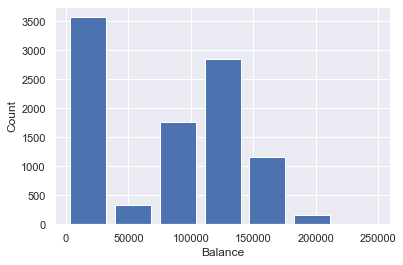

In [31]:
plt.hist(df4['Balance'], bins=7, rwidth=0.8)
plt.xlabel('Balance')
plt.ylabel('Count')
# plt.yscale('log')
plt.show()

In [32]:
MaxThershold = df4['Balance'].quantile(0.999)
MaxThershold

212375.03934000072

In [37]:
MinThershold = df4['Balance'].quantile(0.370)
MinThershold

52909.458799999964

In [38]:
df5 = df4[(df4['Balance'] > MinThershold) & (df4['Balance'] < MaxThershold)]

In [39]:
df5.head()

CreditScore  Gender  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
1          608       2   41       1   83807.86              1          0   
2          502       2   42       8  159660.80              3          1   
4          850       2   43       2  125510.82              1          1   
5          645       1   44       8  113755.78              2          1   
7          376       2   29       4  115046.74              4          1   

   IsActiveMember  EstimatedSalary  Exited  Geography_France  \
1               1        112542.58       0                 0   
2               0        113931.57       1                 1   
4               1         79084.10       0                 0   
5               0        149756.71       1                 0   
7               0        119346.88       1                 0   

   Geography_Germany  Geography_Spain  
1                  0                1  
2                  0                0  
4                  0                1  
5                  0                1  
7                  1                0

In [40]:
df5.isna().sum()

CreditScore          0
Gender               0
Age                  0
Tenure               0
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
Geography_France     0
Geography_Germany    0
Geography_Spain      0
dtype: int64

In [41]:
df5.isnull().sum()

CreditScore          0
Gender               0
Age                  0
Tenure               0
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
Geography_France     0
Geography_Germany    0
Geography_Spain      0
dtype: int64

In [46]:
for column in df5:
    print(f'{column} : {df5[column].nunique()}')

CreditScore : 450
Gender : 2
Age : 66
Tenure : 11
Balance : 6187
NumOfProducts : 4
HasCrCard : 2
IsActiveMember : 2
EstimatedSalary : 6189
Exited : 2
Geography_France : 2
Geography_Germany : 2
Geography_Spain : 2


In [47]:
for column in df5:
    print(f'{column} : {df5[column].unique()}')

CreditScore : [608 502 850 645 376 501 684 528 616 653 756 574 411 533 553 475 490 804
 582 465 556 834 660 776 829 637 550 698 585 655 601 619 656 725 742 687
 555 603 751 581 735 661 675 738 657 604 757 416 665 506 750 635 808 515
 773 814 622 785 605 479 685 538 562 721 628 668 524 699 828 674 432 625
 770 795 789 589 461 579 682 485 650 539 646 631 717 800 683 704 615 484
 480 578 606 597 754 778 730 715 512 580 521 759 711 618 671 689 676 572
 807 726 670 547 594 767 763 703 659 772 634 739 771 544 693 732 557 531
 733 811 712 799 602 744 747 714 511 667 629 614 438 729 806 559 429 525
 680 749 716 644 664 663 584 626 805 642 630 643 654 762 568 613 522 737
 648 443 540 460 593 801 640 611 802 745 690 492 709 705 752 537 487 535
 702 486 724 548 545 627 516 464 534 748 494 592 590 758 514 468 509 662
 816 774 621 658 788 542 591 710 639 673 765 638 691 632 734 779 707 527
 696 519 543 564 833 842 508 587 598 607 848 439 755 647 760 713 666 495
 688 612 546 678 477 427 583 839 706 

In [48]:
continous_feature = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

In [49]:
### Data Scaling -->>Continous data only
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df5[continous_feature] = scaler.fit_transform(df5[continous_feature])

In [50]:
df5.head()

CreditScore  Gender       Age  Tenure   Balance  NumOfProducts  HasCrCard  \
1        0.516       2  0.310811       1  0.193311              1          0   
2        0.304       2  0.324324       8  0.669473              3          1   
4        1.000       2  0.337838       2  0.455099              1          1   
5        0.590       1  0.351351       8  0.381307              2          1   
7        0.052       2  0.148649       4  0.389411              4          1   

   IsActiveMember  EstimatedSalary  Exited  Geography_France  \
1               1         0.556900       0                 0   
2               0         0.563957       1                 1   
4               1         0.386920       0                 0   
5               0         0.745960       1                 0   
7               0         0.591468       1                 0   

   Geography_Germany  Geography_Spain  
1                  0                1  
2                  0                0  
4                  0                1  
5                  0                1  
7                  1                0

In [51]:
X = df5.drop('Exited',axis='columns')
y = df5['Exited']

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [54]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4951, 12), (1238, 12), (4951,), (1238,))

In [55]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [57]:
from tensorflow_addons import losses
from sklearn.metrics import confusion_matrix , classification_report

In [58]:
len(X_train.columns)


12

In [59]:
def ArtificalNeuralNets(X_train, y_train, X_test, y_test, loss, weights):
    model_ChurnPred = keras.Sequential([
        keras.layers.Dense(12, input_shape=(12,), activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])
    
    model_ChurnPred.compile(optimizer='adam',
                            loss='binary_crossentropy',
                            metrics=['accuracy'])
    if weights == -1:
        model_ChurnPred.fit(X_train, y_train, epochs=100)
    else:
        model_ChurnPred.fit(X_train, y_train, epochs=100, class_weight = weights)
        
    print(model_ChurnPred.evaluate(X_test, y_test))
    y_preds = model_ChurnPred.predict(X_test)
    y_preds = np.round(y_preds)
    print("Classification Report: \n", classification_report(y_test, y_preds))
    return y_preds

In [60]:
y_preds = ArtificalNeuralNets(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
155/155 [==============================] - 1s 1ms/step - loss: 0.6174 - accuracy: 0.6828
Epoch 2/100
155/155 [==============================] - 0s 999us/step - loss: 0.5537 - accuracy: 0.7563
Epoch 3/100
155/155 [==============================] - 0s 1ms/step - loss: 0.5343 - accuracy: 0.7582
Epoch 4/100
155/155 [==============================] - 0s 966us/step - loss: 0.5235 - accuracy: 0.7601
Epoch 5/100
155/155 [==============================] - 0s 1ms/step - loss: 0.5063 - accuracy: 0.7665
Epoch 6/100
155/155 [==============================] - 0s 984us/step - loss: 0.5135 - accuracy: 0.7571
Epoch 7/100
155/155 [==============================] - 0s 1ms/step - loss: 0.4981 - accuracy: 0.7725
Epoch 8/100
155/155 [==============================] - 0s 997us/step - loss: 0.4960 - accuracy: 0.7765
Epoch 9/100
155/155 [==============================] - 0s 980us/step - loss: 0.4843 - accuracy: 0.7799
Epoch 10/100
155/155 [==============================] - 0s 977us/step - loss: 0.4

155/155 [==============================] - 0s 1ms/step - loss: 0.3891 - accuracy: 0.8325
Epoch 81/100
155/155 [==============================] - 0s 1ms/step - loss: 0.4029 - accuracy: 0.8320
Epoch 82/100
155/155 [==============================] - 0s 1ms/step - loss: 0.3896 - accuracy: 0.8383
Epoch 83/100
155/155 [==============================] - 0s 1ms/step - loss: 0.3950 - accuracy: 0.8359
Epoch 84/100
155/155 [==============================] - 0s 1ms/step - loss: 0.3842 - accuracy: 0.8368
Epoch 85/100
155/155 [==============================] - 0s 1ms/step - loss: 0.3992 - accuracy: 0.8357
Epoch 86/100
155/155 [==============================] - 0s 1ms/step - loss: 0.3993 - accuracy: 0.8380
Epoch 87/100
155/155 [==============================] - 0s 1ms/step - loss: 0.3766 - accuracy: 0.8467
Epoch 88/100
155/155 [==============================] - 0s 1ms/step - loss: 0.3632 - accuracy: 0.8524
Epoch 89/100
155/155 [==============================] - 0s 1ms/step - loss: 0.3825 - accuracy: 

# Under sampling

In [61]:
# Class count
count_class_0, count_class_1 = df5.Exited.value_counts()

print(count_class_1)
count_class_0

1480


4709

In [63]:
df_class_0 = df5[df5['Exited'] == 0]
df_class_1 = df5[df5['Exited'] == 1]

In [64]:
df_class_0_under = df_class_0.sample(count_class_1)

In [65]:
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

In [66]:
print('Random under-sampling:')
print(df_test_under.Exited.value_counts())

Random under-sampling:
0    1480
1    1480
Name: Exited, dtype: int64


In [67]:
X = df_test_under.drop('Exited',axis='columns')
y = df_test_under['Exited']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [68]:
y_train.value_counts()


0    1184
1    1184
Name: Exited, dtype: int64

In [69]:
y_preds = ArtificalNeuralNets(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
74/74 [==============================] - 0s 1ms/step - loss: 0.6856 - accuracy: 0.5523
Epoch 2/100
74/74 [==============================] - 0s 1ms/step - loss: 0.6756 - accuracy: 0.5780
Epoch 3/100
74/74 [==============================] - 0s 1ms/step - loss: 0.6621 - accuracy: 0.6311
Epoch 4/100
74/74 [==============================] - 0s 1ms/step - loss: 0.6579 - accuracy: 0.6207
Epoch 5/100
74/74 [==============================] - 0s 1ms/step - loss: 0.6450 - accuracy: 0.6465
Epoch 6/100
74/74 [==============================] - 0s 1ms/step - loss: 0.6297 - accuracy: 0.6577
Epoch 7/100
74/74 [==============================] - 0s 1ms/step - loss: 0.6268 - accuracy: 0.6594
Epoch 8/100
74/74 [==============================] - 0s 1ms/step - loss: 0.6263 - accuracy: 0.6484
Epoch 9/100
74/74 [==============================] - 0s 2ms/step - loss: 0.6218 - accuracy: 0.6581
Epoch 10/100
74/74 [==============================] - 0s 1ms/step - loss: 0.6037 - accuracy: 0.6749
Epoch 11/

Epoch 83/100
74/74 [==============================] - 0s 1ms/step - loss: 0.5310 - accuracy: 0.7311
Epoch 84/100
74/74 [==============================] - 0s 1ms/step - loss: 0.5330 - accuracy: 0.7354
Epoch 85/100
74/74 [==============================] - 0s 1ms/step - loss: 0.5521 - accuracy: 0.7089
Epoch 86/100
74/74 [==============================] - 0s 1ms/step - loss: 0.5445 - accuracy: 0.7196
Epoch 87/100
74/74 [==============================] - 0s 1ms/step - loss: 0.5355 - accuracy: 0.7313
Epoch 88/100
74/74 [==============================] - 0s 1ms/step - loss: 0.5341 - accuracy: 0.7318
Epoch 89/100
74/74 [==============================] - 0s 943us/step - loss: 0.5317 - accuracy: 0.7343
Epoch 90/100
74/74 [==============================] - 0s 963us/step - loss: 0.5307 - accuracy: 0.7381
Epoch 91/100
74/74 [==============================] - 0s 1ms/step - loss: 0.5301 - accuracy: 0.7350
Epoch 92/100
74/74 [==============================] - 0s 976us/step - loss: 0.5271 - accuracy: 0

# Over sampling

In [70]:
df_class_1 = df5[df5['Exited'] == 1]

In [71]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_class_1_over

CreditScore  Gender       Age  Tenure   Balance  NumOfProducts  \
2539        0.468       2  0.378378       6  0.215616              2   
5185        0.828       2  0.283784       9  0.535642              1   
4064        0.552       1  0.283784      10  0.497641              3   
7558        0.544       2  0.243243       0  0.351202              2   
1306        0.946       2  0.378378       3  0.179305              1   
...           ...     ...       ...     ...       ...            ...   
5440        0.680       1  0.337838       2  0.712548              1   
4592        0.968       1  0.243243       8  0.564148              1   
2074        0.622       1  0.351351       1  0.553188              1   
4184        0.496       1  0.554054       8  0.409271              2   
1962        0.016       2  0.459459       8  0.568290              3   

      HasCrCard  IsActiveMember  EstimatedSalary  Exited  Geography_France  \
2539          1               0         0.596701       1                 0   
5185          1               0         0.239534       1                 0   
4064          1               1         0.246621       1                 0   
7558          1               0         0.549980       1                 0   
1306          1               1         0.129281       1                 0   
...         ...             ...              ...     ...               ...   
5440          0               0         0.592981       1                 0   
4592          1               0         0.442290       1                 1   
2074          1               0         0.949103       1                 0   
4184          0               0         0.290943       1                 0   
1962          1               0         0.706346       1                 0   

      Geography_Germany  Geography_Spain  
2539                  1                0  
5185                  1                0  
4064                  1                0  
7558                  0                1  
1306                  0                1  
...                 ...              ...  
5440                  1                0  
4592                  0                0  
2074                  1                0  
4184                  1                0  
1962                  0                1  

[4709 rows x 13 columns]

In [72]:
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.Exited.value_counts())

Random over-sampling:
0    4709
1    4709
Name: Exited, dtype: int64


In [73]:
X = df_test_over.drop('Exited',axis='columns')
y = df_test_over['Exited']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [74]:
loss = keras.losses.BinaryCrossentropy()
weights = -1
y_preds = ArtificalNeuralNets(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
236/236 [==============================] - 1s 1ms/step - loss: 0.6649 - accuracy: 0.6116
Epoch 2/100
236/236 [==============================] - 0s 1ms/step - loss: 0.6410 - accuracy: 0.6350
Epoch 3/100
236/236 [==============================] - 0s 1ms/step - loss: 0.6321 - accuracy: 0.6443
Epoch 4/100
236/236 [==============================] - 0s 1ms/step - loss: 0.6133 - accuracy: 0.6586
Epoch 5/100
236/236 [==============================] - 0s 1ms/step - loss: 0.6017 - accuracy: 0.6635
Epoch 6/100
236/236 [==============================] - 0s 1ms/step - loss: 0.5887 - accuracy: 0.6787
Epoch 7/100
236/236 [==============================] - 0s 1ms/step - loss: 0.5835 - accuracy: 0.6851
Epoch 8/100
236/236 [==============================] - 0s 1ms/step - loss: 0.5634 - accuracy: 0.7025
Epoch 9/100
236/236 [==============================] - 0s 1ms/step - loss: 0.5531 - accuracy: 0.7146: 0s - loss: 0.5547 - accura
Epoch 10/100
236/236 [==============================] - 0s 1ms/

236/236 [==============================] - 0s 1ms/step - loss: 0.4681 - accuracy: 0.7678
Epoch 82/100
236/236 [==============================] - 0s 1ms/step - loss: 0.4756 - accuracy: 0.7637
Epoch 83/100
236/236 [==============================] - 0s 1ms/step - loss: 0.4694 - accuracy: 0.7665
Epoch 84/100
236/236 [==============================] - 0s 1ms/step - loss: 0.4715 - accuracy: 0.7619
Epoch 85/100
236/236 [==============================] - 0s 1ms/step - loss: 0.4664 - accuracy: 0.7764
Epoch 86/100
236/236 [==============================] - 0s 1ms/step - loss: 0.4771 - accuracy: 0.7576
Epoch 87/100
236/236 [==============================] - 0s 1ms/step - loss: 0.4808 - accuracy: 0.7620
Epoch 88/100
236/236 [==============================] - 0s 1ms/step - loss: 0.4747 - accuracy: 0.7722
Epoch 89/100
236/236 [==============================] - 0s 1ms/step - loss: 0.4661 - accuracy: 0.7725
Epoch 90/100
236/236 [==============================] - 0s 1ms/step - loss: 0.4601 - accuracy: 

# SMOTE

In [76]:
X = df5.drop('Exited',axis='columns')
y = df5['Exited']

In [78]:
from imblearn.over_sampling import SMOTE


In [79]:
import sklearn
sklearn.__version__

'0.24.1'

In [80]:
import imblearn
imblearn.__version__

'0.8.0'

In [82]:
smote = SMOTE(sampling_strategy='minority')


In [84]:
X_sm, y_sm = smote.fit_sample(X, y)

AttributeError: 'SMOTE' object has no attribute 'fit_sample'